# Student Performance Anaylsis

제출기한 금요일


## Goal
The goal of assignment 1 is to practice data preprocessing and classification through a
Kaggle InClass Competition. You are expected to understand how Kaggle works and
how you can improve your classification model’s performance.

## Task
You are provided with a classification dataset and your task is to build a series of
models with the goal of improving the performance. You can use any data
preprocessing technique and classification method.

## Data description
A detailed description is available at
https://archive.ics.uci.edu/ml/datasets/student+performance
The dataset used in the assignment 1 is a slightly modified version with 30 features and 1 categorical target variable. The goal is to use the 30 features and classify each
student into one of the FIVE categories.

## How
1. Go to https://www.kaggle.com/t/9f9472665a4747cf8f15d1dd9cea1261 and createan account if you don’t have.
2. Go to Data tab and download data files.

    - X_train.csv: 264 samples, 30 features (Id should not be counted as a feature)
    - y_train.csv: 264 samples, 1 target (from 1 to 5, each number represents a category)
    - X_test.csv: 131 samples, 30 features (the dataset you test your model) 
    - sample_submission.csv: This is a sample submission file and when you submit your classification result for X_test, your final submission file should have the same format. It is a csv file with two columns Id and Category. Because it is a sample submission file, it has only 9 samples. The final submission file should have 131 samples (the same as X_test) with two columns Id and Category. Id column in your submission file is from X_test, and Category column should include your precited results (i.e., 1 or 2 or 3 or 4, or 5). After you do the prediction, you should generate an output file that has the same format with sample_sbmission.csv and submit it to the Kaggle. The file name can be arbitrary.
3.  After submitting the result file. you will be able to see the score. The evaluation method is simple classification accuracy.
4. Try to improve the score by testing different preprocessing and classification methods. You are allowed to submit up to 20 times a day.

## Deliverable
One-page short summary on

- Your Kaggle account
- How many submissions have you tried to improve the performance?
- What methods have you tried?
- Did the methods improve the performance? Why or Why not?
- Please explain your best solution with the highest score (e.g., what classification method + how you preprocessed the data)
- What have you learned from the competition?

## IMPORTANT
1. You don’t need to use your real name for the Kaggle account because the goal of the competition is to compete with yourselves, not with your peers.
2. The assignment will not be graded based on the Kaggle score. The assignment will be evaluated based on your one-page summary. Please write it carefully so that I can evaluate your efforts.
3. As I already disclosed the data source, you can find the correct answers easily on the web. Any attempts to artificially make submission files using correct answers will be regarded as PLAGIARISM.
4. If you have questions on reading the dataset and generating the submission files you can ask me or your peers. However, solutions should be your own. 

## REF : 
- [깃헙](https://github.com/sachanganesh/student-performance-prediction/blob/master/model.py)
- [타이타닉 예제](https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner)
- [판다스 요용한 전처리 함수](http://rfriend.tistory.com/tag/pd.get_dummies%28%29%20%EB%A5%BC%20%EC%9D%B4%EC%9A%A9%ED%95%B4%20%EA%B0%80%EB%B3%80%EC%88%98%28dummy%20var%29%20%EB%A7%8C%EB%93%A4%EA%B8%B0)


## 1. Understanding train and test dataset
### Data Dictionary
Attribute Information:

- Attributes for both student-mat.csv (Math course) and student-por.csv 

### 라이브러리 가져오기

In [1]:
# 데이터 분석 라이브러리
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



### csv 파일 읽기

In [2]:
X_train = pd.read_csv('./all/X_train.csv')
X_test = pd.read_csv('./all/X_test.csv')
y_train = pd.read_csv('./all/y_train.csv')

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 31 columns):
id            264 non-null int64
school        264 non-null object
sex           264 non-null object
age           264 non-null int64
address       264 non-null object
famsize       264 non-null object
Pstatus       264 non-null object
Medu          264 non-null int64
Fedu          264 non-null int64
Mjob          264 non-null object
Fjob          264 non-null object
reason        264 non-null object
guardian      264 non-null object
traveltime    264 non-null int64
studytime     264 non-null int64
failures      264 non-null int64
schoolsup     264 non-null object
famsup        264 non-null object
paid          264 non-null object
activities    264 non-null object
nursery       264 non-null object
higher        264 non-null object
internet      264 non-null object
romantic      264 non-null object
famrel        264 non-null int64
freetime      264 non-null int64
goout         264 no

In [4]:
y_train.head()

,id,G3C
0,310,5
1,355,3
2,218,4
3,88,3
4,131,5


In [17]:
X=X_train
Y=y_train

In [15]:

data = pd.concat([X_train,y_train],axis=1)
features = data.columns.values.tolist()
features = features[1:len(features)-2]

In [13]:
def data_explore(feature):
    print("*******************",feature,"************************")
    print(X[feature].value_counts().sort_values(ascending = False))

In [16]:
for temp in features: 
    data_explore(temp)

******************* school ************************
GP    238
MS     26
Name: school, dtype: int64
******************* sex ************************
F    139
M    125
Name: sex, dtype: int64
******************* age ************************
17    68
16    66
15    61
18    51
19    16
20     2
Name: age, dtype: int64
******************* address ************************
U    198
R     66
Name: address, dtype: int64
******************* famsize ************************
GT3    184
LE3     80
Name: famsize, dtype: int64
******************* Pstatus ************************
T    226
A     38
Name: Pstatus, dtype: int64
******************* Medu ************************
4    89
2    71
3    66
1    37
0     1
Name: Medu, dtype: int64
******************* Fedu ************************
2    77
4    68
3    65
1    53
0     1
Name: Fedu, dtype: int64
******************* Mjob ************************
other       96
services    72
at_home     38
teacher     35
health      23
Name: Mjob, dtype: int64
**

### Data analysis results

### 그래프를 이용한 데이터 분석

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [19]:
def bar_chart(feature) : 
    ca1 = data[data['G3C']==1][feature].value_counts()
    ca2 = data[data['G3C']==2][feature].value_counts()
    ca3 = data[data['G3C']==3][feature].value_counts()
    ca4 = data[data['G3C']==4][feature].value_counts()
    ca5 = data[data['G3C']==5][feature].value_counts()
    df=pd.DataFrame([ca1,ca2,ca3,ca4,ca5])
    df.index = ['C1','C2','C3','C4','C5']
    df.plot(kind = 'bar',title = feature,stacked=True,figsize = (10,5))

#### 각 데이터와 y와의 상관관계분석을 위해 barchart를 그려보았다. 

C:\Users\YOONHOI\Anaconda3\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


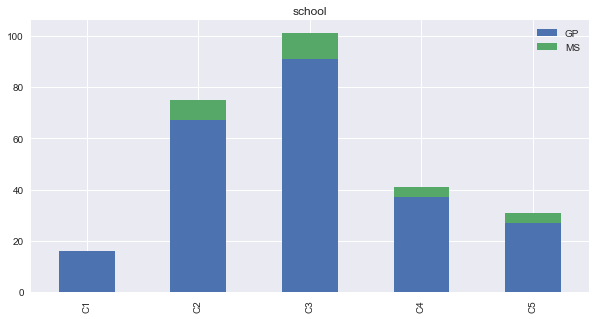

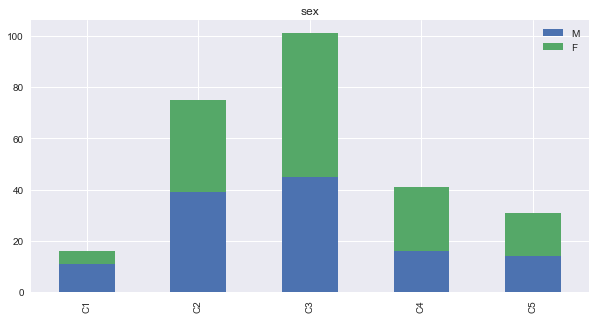

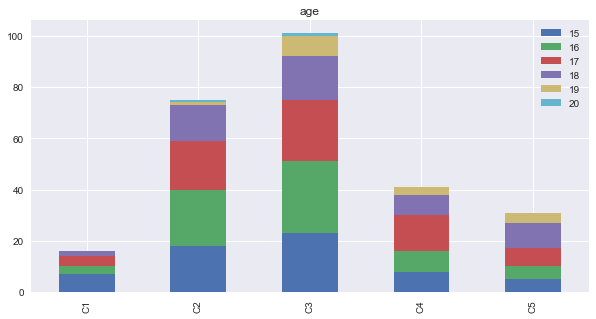

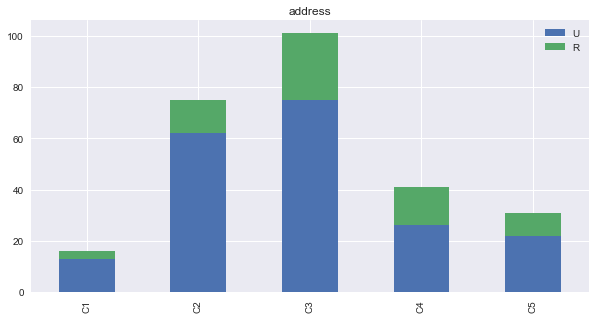

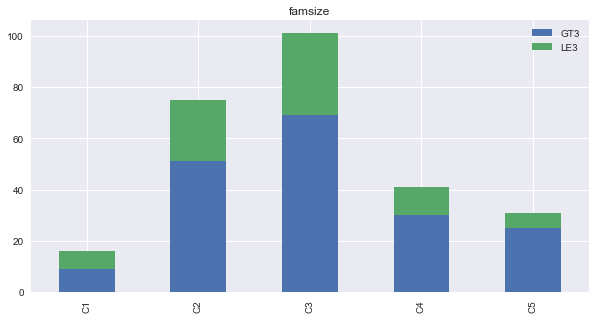

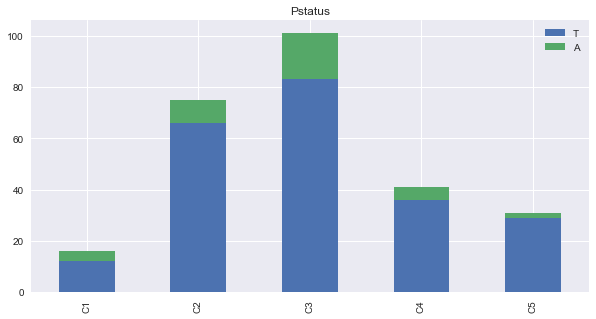

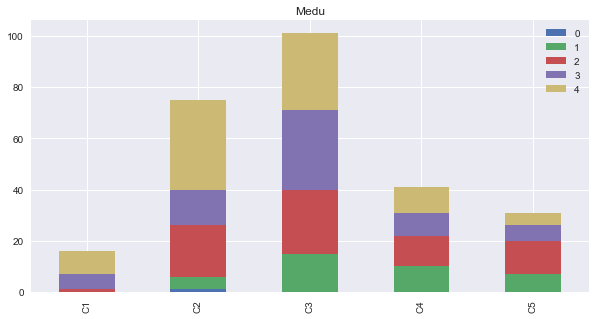

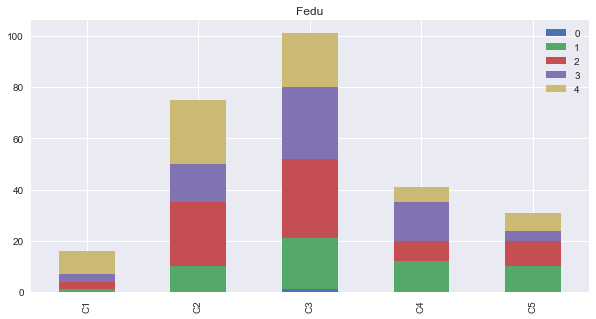

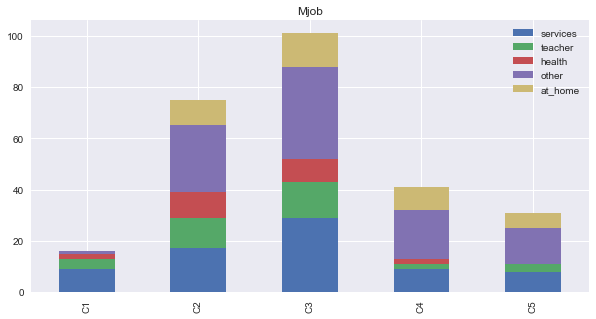

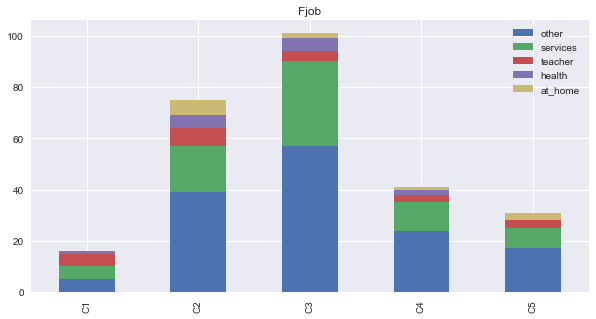

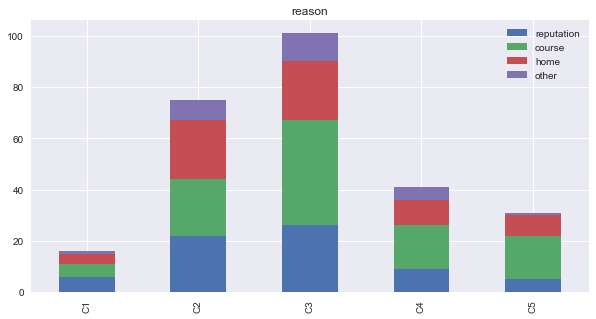

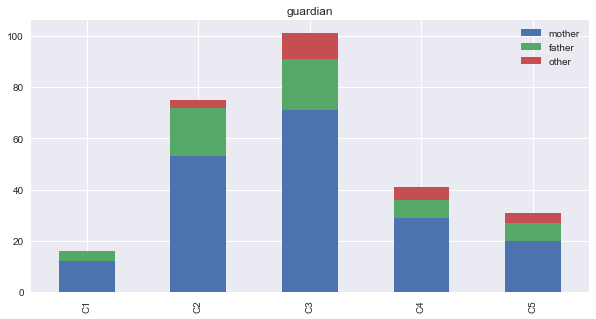

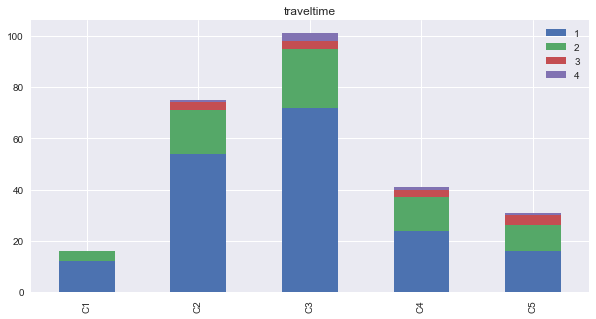

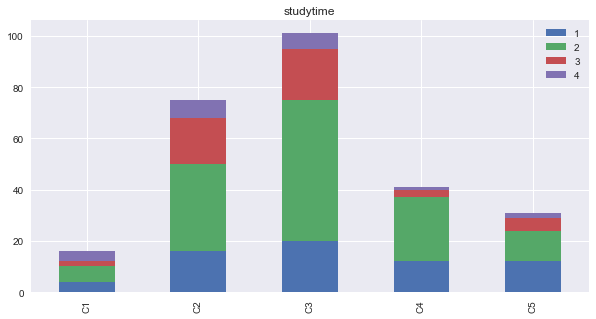

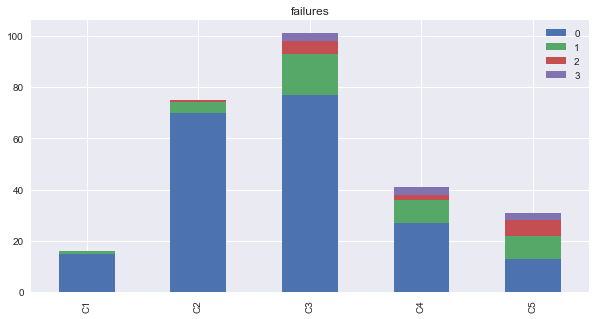

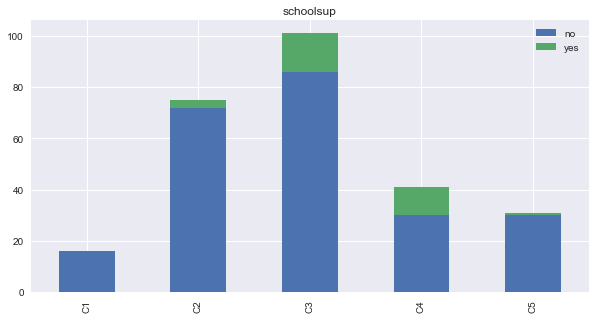

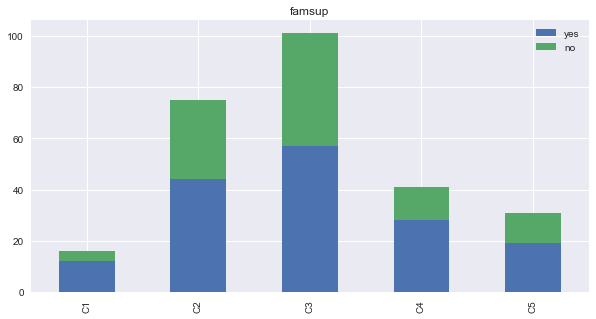

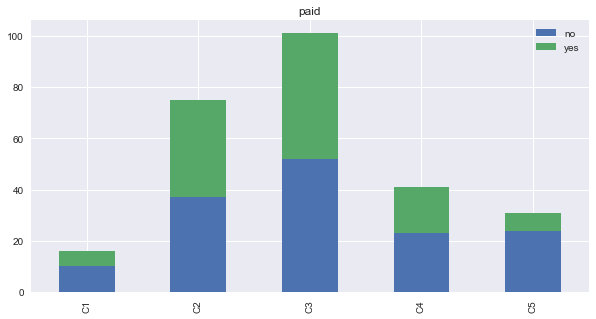

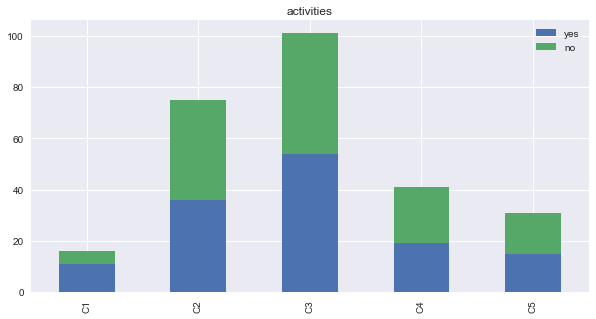

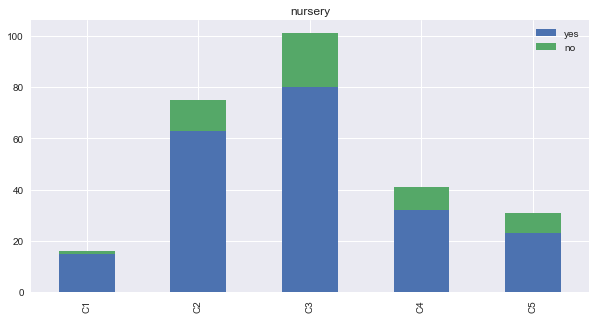

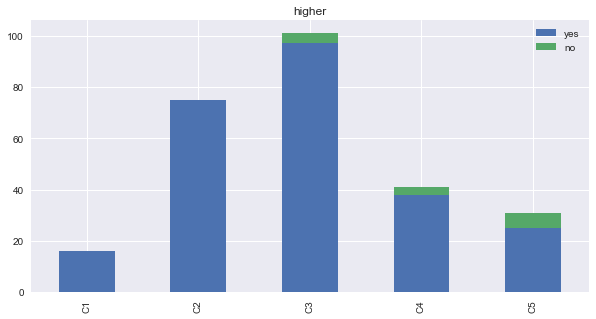

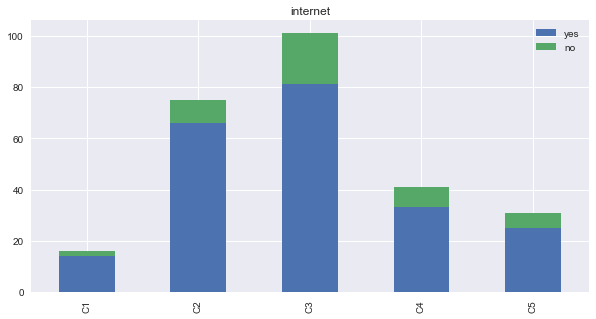

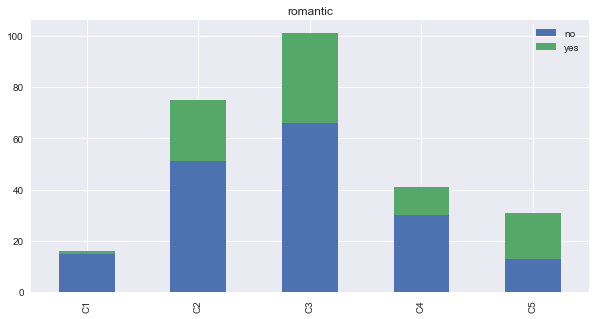

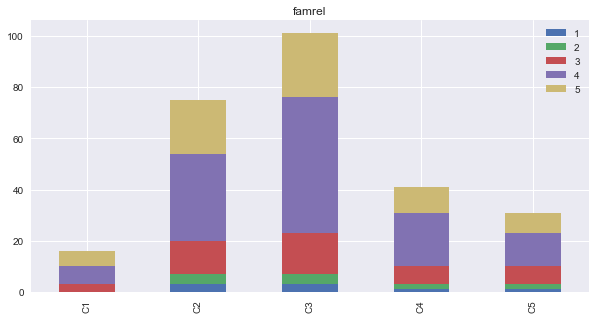

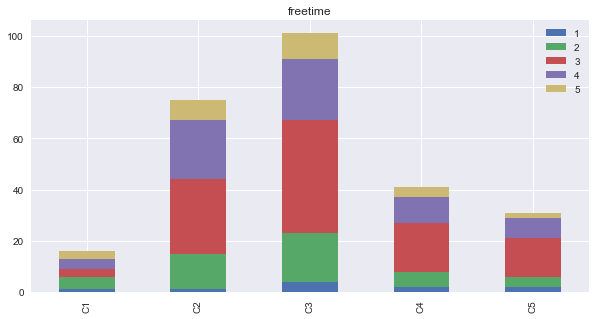

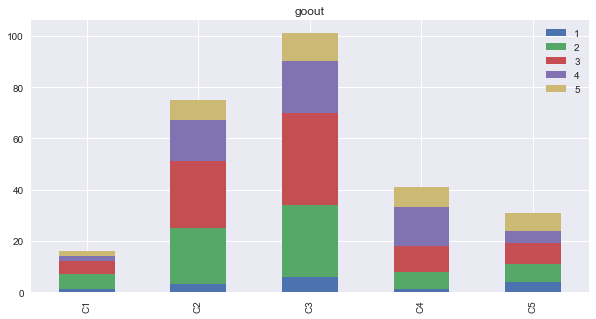

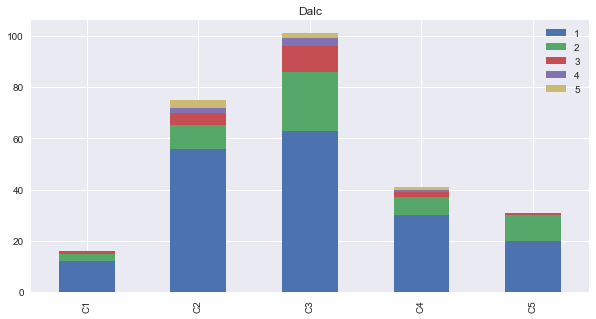

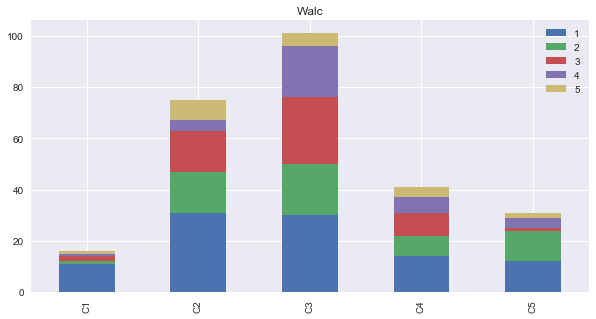

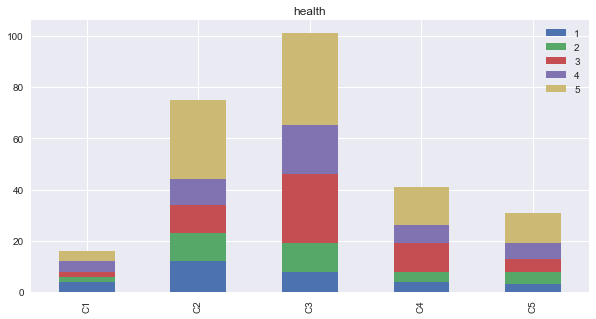

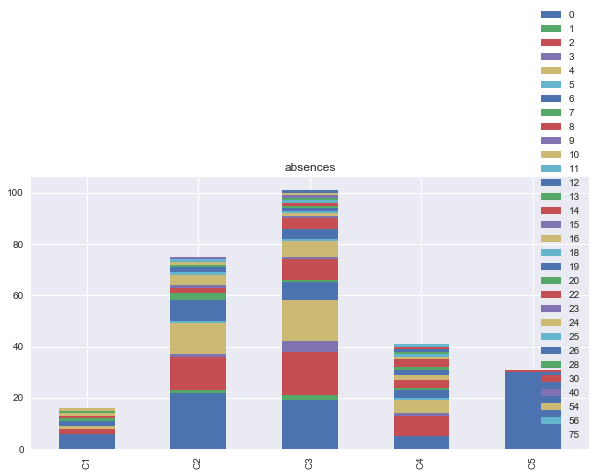

In [20]:
for i in range(len(features)) :
    bar_chart(features[i])
    

## 2. Feature engineeering

In [21]:
#function for concatation so that we won't have to repeat them again and again in future.
def combine(data1,data2):
    fulldf = pd.concat([data1,data2])
    return fulldf

In [22]:
#Function for separation so that we won't have to repeat them again.
def separate(data):
    data1 = data.iloc[:len(X_train)]
    data2 = data.iloc[len(X_train):]
    return data1, data2

In [23]:
yesorno = ['schoolsup', 'famsup','paid','activities', 'nursery','higher','internet','romantic']
    # multiple categories
multi = ['Mjob','Fjob','reason','guardian']

#### binary 값을 0,1로 바꿔서 저장

In [24]:
def mapping(data1, data2) : 
    data = combine(data1, data2)
    
    #binary
    data['school'] = data['school'].map({'GP':0, 'MS':1})
    data['sex'] = data['sex'].map({'F':0, 'M':1})
    data['address'] = data['address'].map({'U':0, 'R':1})
    data['famsize'] = data['famsize'].map({'GT3':0, 'LE3':1})
    data['Pstatus'] = data['Pstatus'].map({'T':0, 'A':1})
    
    #yes or no 
    for attr in yesorno:
        data[attr] = data[attr].map({'no':0, 'yes':1})
    
    data1,data2 = separate(data)
    return data1, data2

In [25]:
X,X_=mapping(X_train,X_test)

### 연속형 범주의 이산형화
##### absences, age

In [26]:
import numpy as np
import pandas as pd
from pandas import DataFrame


In [27]:
def absences_distribution(data1, data2):
    data = combine(data1,data2)
    data.loc[data['absences']].round()
    data.loc[data['absences'] <= 1, 'absence_group'] = 1
    data.loc[(data['absences'] > 1) & (data['absences'] <= 3), 'absence_group'] = 2
    data.loc[(data['absences'] > 3) & (data['absences'] <= 6), 'absence_group'] = 3
    data.loc[(data['absences'] > 6)& (data['absences'] <= 11), 'absence_group'] = 4
    data.loc[(data['absences'] > 11), 'absence_group'] = 5
    data['absence_group'].astype(int)
    data1, data2    = separate(data)
    return data1, data2


In [28]:
def age_distribution(data1, data2):
    data = combine(data1,data2)
    data.loc[data['age']].round()
    data.loc[data['age'] <= 16, 'age_group'] = 1
    data.loc[(data['age'] > 16) & (data['age'] <= 18), 'age_group'] = 2
    data.loc[(data['age'] > 18), 'age_group'] = 3
    data['age_group'].astype(int)
    data1, data2    = separate(data)
    return data1, data2

In [29]:

X, X_= absences_distribution(X,X_)
X, X_= age_distribution(X,X_)


#### categorical -> get_dummies 를 이용, 원핫 코드

In [30]:
Mjob_ = pd.get_dummies(X.Mjob,prefix = 'Mjob')
Fjob_ = pd.get_dummies(X.Fjob,prefix ='Fjob')
reason = pd.get_dummies(X.reason,prefix ='reason')
guardian = pd.get_dummies(X.guardian,prefix ='guardian')
age = pd.get_dummies(X.age_group,prefix = 'age')
absence=pd.get_dummies(X.absence_group,prefix = 'absence')

In [31]:
X_1 = pd.concat([X,Mjob_],axis =1)
X_1 = pd.concat([X_1,Fjob_],axis =1)
X_1 = pd.concat([X_1,reason],axis =1)
X_1 = pd.concat([X_1,guardian],axis =1)
X_1 = pd.concat([X_1,age],axis =1)
X_1 = pd.concat([X_1,absence],axis =1)


In [32]:
Mjob_ = pd.get_dummies(X_.Mjob, prefix = 'Mjob')
Fjob_ = pd.get_dummies(X_.Fjob, prefix = 'Fjob')
reason = pd.get_dummies(X_.reason, prefix = 'reason')
guardian = pd.get_dummies(X_.guardian, prefix = 'guardian')
age = pd.get_dummies(X_.age_group,prefix = 'age')
absence=pd.get_dummies(X_.absence_group,prefix = 'absence')

In [33]:
X_2 = pd.concat([X_,Mjob_],axis =1)
X_2 = pd.concat([X_2,Fjob_],axis =1)
X_2 = pd.concat([X_2,reason],axis =1)
X_2 = pd.concat([X_2,guardian],axis =1)
X_2 = pd.concat([X_2,age],axis =1)
X_2 = pd.concat([X_2,absence],axis =1)

In [34]:
for temp in multi : 
    del X_1[temp]
    del X_2[temp]

del X_1['age']
del X_1['absences']

del X_2['age']
del X_2['absences']

In [35]:
def del_feature(feature):
    del X_1[feature]
    del X_2[feature]
    return X_1, X_2

#### X_1,X_2 는 숫자로만 이루어져 있음
- X_1 : x_train (feature engineering)
- X_2 : x_test (featur engineering)

## 3. Splitting the Training Data


In [36]:
from sklearn.model_selection import train_test_split

predictors = X_1.iloc[:,1:]
test = X_2.iloc[:,1:]
target= Y.iloc[:,1]


# 데이터셋을 (training +validation), test 로 나눈다. 
x_train,x_val,y_train,y_val = train_test_split(predictors, target,  random_state =0)

print("size of training set: %d,  size of validation set: %d,  size of test set: %d" % (
        x_train.shape[0], x_val.shape[0], test.shape[0]))

size of training set: 198,  size of validation set: 66,  size of test set: 131


## 4. Comparing Models
- Naive Bayes
- Decision Trees
- k-Nearest Neighbors
- SVM

#### Gaussian Naive Bayes 

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score 

gaussian = GaussianNB()
gaussian.fit(x_train,y_train)
y_pred=gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_gaussian)

7.58


####  Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_logreg)

33.33


C:\Users\YOONHOI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\YOONHOI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


#### Support Vector Machines

In [40]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_svc)

34.85


C:\Users\YOONHOI\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


####  Linear SVC

In [41]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_linear_svc)

33.33


C:\Users\YOONHOI\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


####  Perceptron

In [42]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_perceptron)

33.33


C:\Users\YOONHOI\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


#### Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train,y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_decisiontree)

34.85


#### Rondom Forest 

In [44]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val)*100,2)
print(acc_randomforest)

28.79


C:\Users\YOONHOI\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [45]:
#### kNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val)*100,2)
print(acc_knn)

36.36


#### Stochastic Gradient Descent

In [46]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd =round(accuracy_score(y_pred,y_val)*100,2)
print(acc_sgd)

36.36


C:\Users\YOONHOI\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


#### Gradient Boosting Classifier                                               

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train,y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_gbk)

36.36


#### Compare the accuracies of each model

In [48]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,KNN,36.36
8,Stochastic Gradient Descent,36.36
9,Gradient Boosting Classifier,36.36
0,Support Vector Machines,34.85
7,Decision Tree,34.85
2,Logistic Regression,33.33
5,Perceptron,33.33
6,Linear SVC,33.33
3,Random Forest,28.79
4,Naive Bayes,7.58


# Test with validation set

In [53]:
best_score = 0

for gamma in [0.0001, 0.001, 0.01,1 ,10,100]:
    for C in [0.0001, 0.001, 0.01,1,10,100]:
        # 매개변수 각 조합에 대해 SVC 훈련    
        svm = SVC(gamma=gamma, C=C)
        
        # train set으로 model fitting
        svm.fit(x_train, y_train)
        
        # validation set으로 SVC 평가         
        score = svm.score(x_val, y_val) 
        
        # 점수가 더 높으면 기록 
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("최고 점수(모델 정확도):", best_score)
print("최적 매개변수:", best_parameters)            

최고 점수(모델 정확도): 0.3939393939393939
최적 매개변수: {'C': 100, 'gamma': 0.001}


In [54]:
# training set과 validation set을 합쳐 모델을 다시 만든 후 
# test set을 이용하여 모델을 평가 
svm = SVC(**best_parameters)
svm.fit(predictors, target)
print("validation set에서 최고 점수: ", best_score)
print("최적 매개변수: ", best_parameters)

validation set에서 최고 점수:  0.3939393939393939
최적 매개변수:  {'C': 100, 'gamma': 0.001}


# Test with Cross validation

In [55]:
param_grid = {'C':[1,10,100,500,1000]
             ,'gamma':[0.0001,0.001,0.01,0.1]}

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# overfitting 방지를 위해 training, test set으로 나눔
#x_train, x_test, y_train, y_test = train_test_split(X_1, y, random_state=0)
grid_search.fit(x_train, y_train)

print("최적 매개변수 : ",grid_search.best_params_) 
print("최상 교차검증 점수 : ",grid_search.best_score_)
print("최고 성능 모델 : ",grid_search.best_estimator_)

최적 매개변수 :  {'C': 1, 'gamma': 0.1}
최상 교차검증 점수 :  0.4292929292929293
최고 성능 모델 :  SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


C:\Users\YOONHOI\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [57]:
from sklearn.svm import SVC

parameters_svm={'C':1,'kernel':'rbf','gamma':0.1,'random_state':0}

svc = SVC(**parameters_svm)
svc.fit(predictors, target)
y_pred = svc.predict(test)


In [60]:
parameters_svm={'C':1,'kernel':'rbf','gamma':0.1,'random_state':0}

clf = SVC(**parameters_svm)
clf.fit(predictors,target)
prediction = clf.predict(test)


## submission.csv 만들기

In [61]:
import collections, numpy 
collections.Counter(prediction)

Counter({5: 4, 3: 103, 2: 24})

In [62]:
submission = pd.DataFrame({
    "Id" : X_2['id'],
    "Category" : prediction
})
submission.to_csv('submission.csv',index = False)

# accuracy  = 0.51145